<a href="https://colab.research.google.com/github/Aayush9-spec/Object_Detection/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

See the world through AI

Day 1: Setup & Image Detection

Goal:
Install and import Yolo (Ultralytics YOLOv8)
Set up YOLO and detect objects in a single image.
YOLO - YOU ONLY LOOK ONCE
Load pretrained model
Run inference on an image
Display results

In [1]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.7 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from google.colab import files

upload = files.upload()
file_name = list(upload.keys())[0]
print("Uploaded:", file_name)

Saving WhatsApp Image 2025-07-25 at 13.08.58 (1).jpeg to WhatsApp Image 2025-07-25 at 13.08.58 (1).jpeg
Uploaded: WhatsApp Image 2025-07-25 at 13.08.58 (1).jpeg


In [4]:
model = YOLO('yolov8n.pt')

In [5]:
from typing import Annotated
results = model(file_name)
annotated = results[0].plot()



image 1/1 /content/WhatsApp Image 2025-07-25 at 13.08.58 (1).jpeg: 640x512 11 persons, 9 chairs, 4 laptops, 69.7ms
Speed: 13.6ms preprocess, 69.7ms inference, 309.7ms postprocess per image at shape (1, 3, 640, 512)


(np.float64(-0.5), np.float64(2266.5), np.float64(2833.5), np.float64(-0.5))

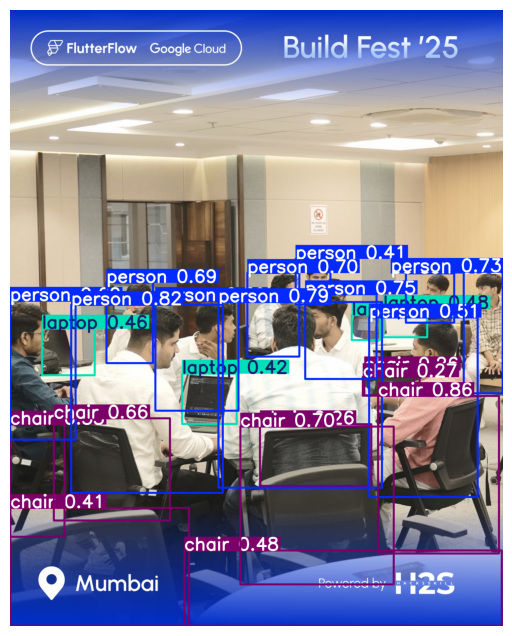

In [6]:
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')

Day 2: Object Detection On Video

In [7]:
uploaded = files.upload()
video_path = list(uploaded.keys())[0]
print("Uploaded:",video_path)

Saving Kota_prism.mp4 to Kota_prism.mp4
Uploaded: Kota_prism.mp4


In [8]:
output_path = "output_detected.mp4"
cap=cv2.VideoCapture(video_path)
width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps=cap.get(cv2.CAP_PROP_FPS)or 25.0
fourcc=cv2.VideoWriter_fourcc(*'mp4v')
out=cv2.VideoWriter(output_path,fourcc,fps,(width,height))

frame_count =0
while True:
  ret, frame = cap.read()
  if not ret:
    break
  results = model(frame)
  annotated=results[0].plot()
  out.write(annotated)
  frame_count+=1
  if frame_count%100==0:
    print(f"Processed {frame_count} frames")
cap.release()
out.release()

print("Video Saved:",output_path)
files.download(output_path)



0: 640x384 (no detections), 45.5ms
Speed: 2.5ms preprocess, 45.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 kite, 8.0ms
Speed: 3.0ms preprocess, 8.0ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 kite, 8.0ms
Speed: 3.2ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 7.9ms
Speed: 3.0ms preprocess, 7.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 kite, 8.7ms
Speed: 3.3ms preprocess, 8.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 8.0ms
Speed: 3.2ms preprocess, 8.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 kite, 7.5ms
Speed: 3.0ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 kite, 7.4ms
Speed: 2.9ms preprocess, 7.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Day 3:


Captured: snapshot.jpg

image 1/1 /content/snapshot.jpg: 480x640 1 person, 1 cell phone, 63.4ms
Speed: 1.6ms preprocess, 63.4ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


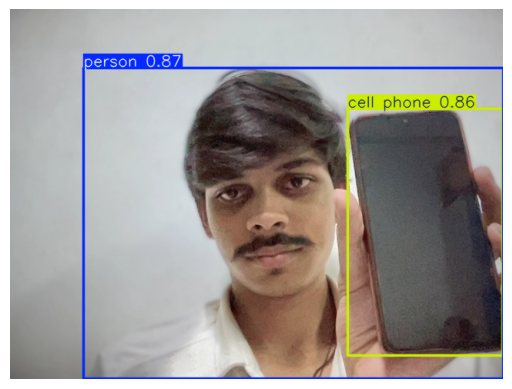

In [9]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
from base64 import b64decode
from IPython import display as output # Import the display module
import google.colab # Import the google.colab module

model = YOLO('yolov8n.pt')

def take_photo(filename = 'snapshot.jpg'):
  js = """
    async function takePhoto() {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      document.body.appendChild(div);


      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(video);
      video.srcObject = stream;
      await video.play();


      // Resize window
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);


      // Wait for Capture button
      await new Promise((resolve) => capture.onclick = resolve);


      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      const imgData = canvas.toDataURL('image/jpeg').split(',')[1];
      div.remove();
      return imgData;
    }
    takePhoto();
"""
  data = google.colab.output.eval_js(js) # Corrected eval_js
  with open(filename, 'wb') as f:
    f.write(b64decode(data))
  return filename

filename = take_photo('snapshot.jpg')
print("Captured:", filename)

results = model(filename)
annotated = results[0].plot()

plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Day 4: Mini YOLO Training

In [10]:
!pip install ultralytics --quiet
from ultralytics import YOLO

In [11]:
model = YOLO('yolov8n.pt')

In [25]:
!curl -L "https://github.com/ultralytics/assets/releases/download/v0.0.0/coco128.zip" -o coco128.zip
!unzip -q coco128.zip -d dataset
!ls dataset/coco128

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  7385k      0 --:--:-- --:--:-- --:--:-- 7385k
replace dataset/coco128/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
data.yaml  images  labels  LICENSE  README.txt


In [32]:
%%writefile dataset/coco128/data.yaml
path: dataset/coco128
train: images/train2017
val: images/train2017

nc: 80
names:
 0: person
 1: bicycle
 2: car
 3: motorcycle
 4: airplane
 5: bus
 6: train
 7: truck
 8: boat
 9: traffic light
 10: fire hydrant
 11: stop sign
 12: parking meter
 13: bench
 14: bird
 15: cat
 16: dog
 17: horse
 18: sheep
 19: cow
 20: elephant
 21: bear
 22: zebra
 23: giraffe
 24: backpack
 25: umbrella
 26: handbag
 27: tie
 28: suitcase
 29: frisbee
 30: skis
 31: snowboard
 32: sports ball
 33: kite
 34: baseball bat
 35: baseball glove
 36: skateboard
 37: surfboard
 38: tennis racket
 39: bottle
 40: wine glass
 41: cup
 42: fork
 43: knife
 44: spoon
 45: bowl
 46: banana
 47: apple
 48: sandwich
 49: orange
 50: broccoli
 51: carrot
 52: hot dog
 53: pizza
 54: donut
 55: cake
 56: chair
 57: couch
 58: potted plant
 59: bed
 60: dining table
 61: toilet
 62: tv
 63: laptop
 64: mouse
 65: remote
 66: keyboard
 67: cell phone
 68: microwave
 69: oven
 70: toaster
 71: sink
 72: refrigerator
 73: book
 74: clock
 75: vase
 76: scissors
 77: teddy bear
 78: hair drier
 79: toothbrush

Overwriting dataset/coco128/data.yaml


In [28]:
model = YOLO('yolov8n.pt')
model.train(
    data="dataset/coco128/data.yaml",
    epochs=10,
    imgsz=640,
    project="YOLO_Training",
    name="yolov8n_custom"
)

Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/coco128/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_custom8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b587f07bf20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

In [29]:
results = model.predict("/content/dataset/coco128/images/train2017/000000000009.jpg", save = True)


image 1/1 /content/dataset/coco128/images/train2017/000000000009.jpg: 480x640 3 bowls, 3 oranges, 1 broccoli, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/YOLO_Training/yolov8n_custom82


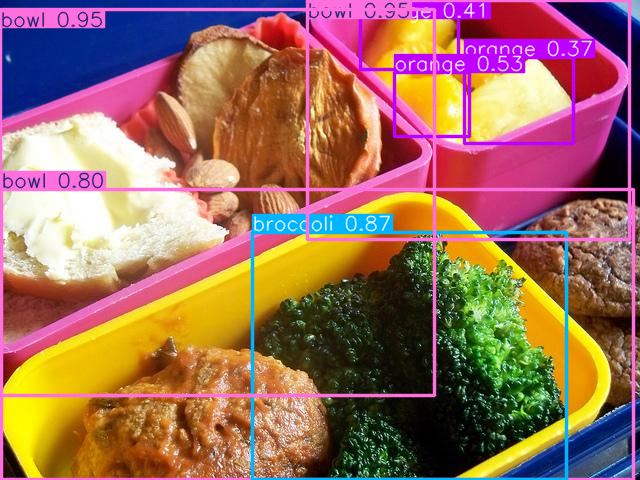

In [30]:
results[0].show()